In [96]:
import os
import sys
import json
import itertools

import json
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams['figure.constrained_layout.use'] = True

In [135]:
colors = {
        'RL4IM': 'darkorchid',
        'A': 'darkorchid',
        'B': 'darkorchid',
        'C': 'deeppink',
        'D': 'olive',
        'E': 'teal',
        'CHANGE': 'darkorange',
        'G': 'purple',
        'H': 'royalblue',
        'I': 'orangered',
        'Kahlil et al. 2017': 'dodgerblue',
        'K': 'chocolate',
        'L': 'turquoise',
        'M': 'green',
        'N': 'black',
        'Random': 'red',
        'P': 'cyan',
        'Q': 'teal',
        'CELF': 'cyan',
        'S': 'turquoise',
        'T': 'slateblue',
}

In [136]:
def convert_labels(labels):
    for i, label in enumerate(labels):
        if label == '500K':
            labels[i] = '0.5M'
        if label == '1000K':
            labels[i] = '1M'
    return labels

In [163]:
#script to process test results
data_root = "data/test"
test_influence = {}

#runs = [360, 361, 389, 363, 364] #RL4IM Exp 2.1.1
#runs = [371, 372, 373, 374, 375] #baseRL Exp 2.2.1
#runs = [352, 353, 354, 355, 356] #random Exp 2.4
#runs = [360, 361, 389, 363, 364] #RL4IM Exp 2.1.1
#runs = [371, 372, 373, 374, 375] #baseRL Exp 2.2.1
#runs = [352, 353, 354, 355, 356] #random Exp 2.4
#runs = [10001, 10002, 10003, 10004, 10005]
#runs = [1, 2, 3, 4, 5] # ada_greedy Exp 2.3

#runs = [360, 361, 389, 363, 364] #RL4IM Exp 2.1.1
#runs = [371, 372, 373, 374, 375] #baseRL Exp 2.2.1
#runs = [352, 353, 354, 355, 356] #random Exp 2.4
#runs = [1, 2, 3, 4, 5] #ada_greedy Exp 2.3 
#runs = [10053, 10054, 10055, 10056, 10058] #greedy Exp 2.5

runs = os.listdir(data_root)

#Q2:
runs = {
    'CHANGE': [17, 18, 21, 19, 20],
    'CELF': [23, 25, 24, 27, 26],
    'Random': [28, 29, 30, 31, 32],
    #'Kahlil et al. 2017': [371, 372, 373, 374, 375],
    #'RL4IM': []
}

#Q3:
runs = {
    'CHANGE': [47, 48, 49, 50],
    'CELF': [56, 57, 58, 59],
    'Random': [43, 44, 45, 45],
    #'Kahlil et al. 2017': [],
    #'RL4IM': []
}


for method, run_ids in runs.items():
    test_influence[method] = {}
    test_influence[method]['raw_data'] = []
    
    print(f'method: {method}, runs: {run_ids}')
    for r in run_ids:
        
        with open(os.path.join(data_root, str(r), 'test_mode_results.json')) as f:
            test_influence[method]['raw_data'].append(json.load(f)['episode_accumulated_rewards'])

    data = np.stack(test_influence[method]['raw_data'], axis=-1)
    
    test_influence[method]['mean_std'] = np.mean(np.mean(data, axis=-1), axis=1), \
                                         np.std(np.std(data, axis=-1), axis=1)

method: CHANGE, runs: [47, 48, 49, 50]
method: CELF, runs: [56, 57, 58, 59]
method: Random, runs: [43, 44, 45, 45]


In [164]:
len(test_influence.keys())

3

In [165]:
def plot_algo(ax, algo_name, algo_label, algo_mean, algo_std, lw, alpha=0.3):
    ax.plot(range(len(algo_mean)), algo_mean, label=algo_label, lw=lw, color=colors[algo_name])
    ax.fill_between(range(len(algo_mean)), 
                    algo_mean+algo_std, 
                    algo_mean-algo_std,
                    facecolor=colors[algo_name], 
                    alpha=alpha)

In [166]:
def plot_figures(data, plot_legend=True):
    fig = plt.figure()
    lw = 1
    # fig.subplots_adjust(hspace=0.4, wspace=0.4)
    col = 1   # graph name
    nrows = 1 # runs
    alpha_shade = 0.18

    fig, ax = plt.subplots(nrows=nrows, ncols=col, figsize=(4,3))
    
    for methd, data in data.items():
            
        mean, std = data['mean_std']

        plot_algo(ax, algo_name=methd, algo_label=methd, algo_mean=mean, algo_std=std, lw=lw, alpha=alpha_shade)

    ax.set_xlabel('q', fontsize=12)
    ax.set_ylabel('Rewards', fontsize=12)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.grid(color='grey', ls = ':', lw=0.5)

    #ax.spines['right'].set_color((.5,.5,.5))
    #ax.spines['top'].set_color((.9,.9,.9))

    #print(xlabels)
    ax.set_xticks(range(0, 10))
    ax.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    #ax.set_yticks([0, 25, 50, 75, 100])
    #print(ax.get_xticks())

    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)
    
    legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fontsize=12, ncol=12, frameon=False)
    # legend = ax.legend(fontsize=6, frameon=False)
    for line in legend.get_lines():
        line.set_linewidth(3)
    ax.set_title(f'results', fontsize=12)
    
    os.makedirs('./images', exist_ok=True)
    plt.savefig(f'./images/plot_1.pdf', bbox_inches='tight')

<Figure size 1800x1200 with 0 Axes>

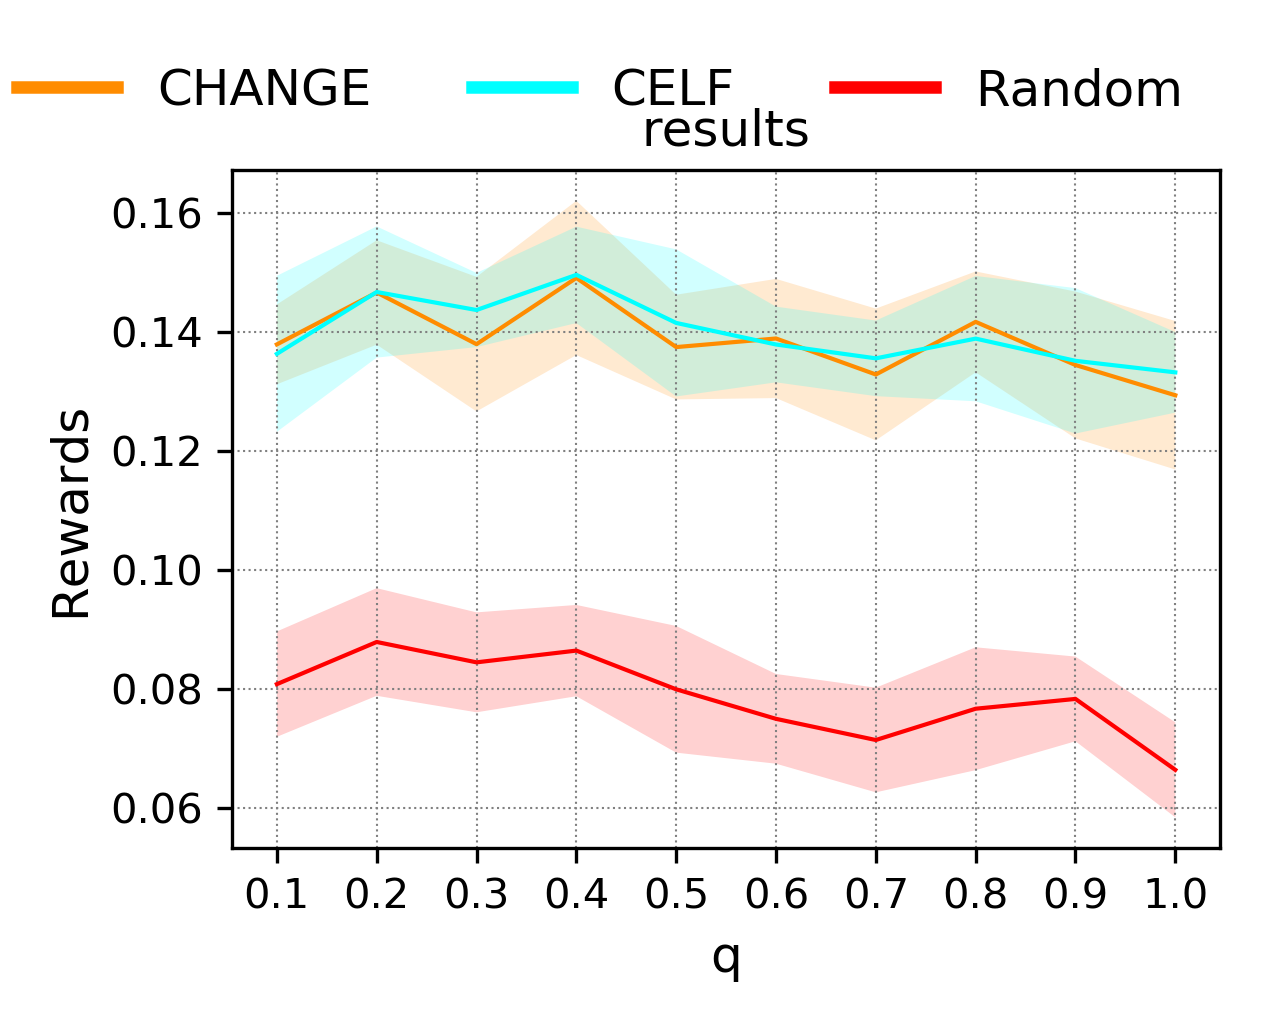

In [167]:
plot_figures(test_influence, plot_legend=True)